## PROJECT-CASE STUDY: STARTUP FUNDINGS
### BY: Aditi Dona

 1) Find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding.

SOLUTION: Bangalore

JUSTIFICATION:
Here, after tackling all the conditions given in the question i have used a dictionary to count the number of times a startup was funded in a particular city. Hence Bangalore is best suited for a Startup.

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


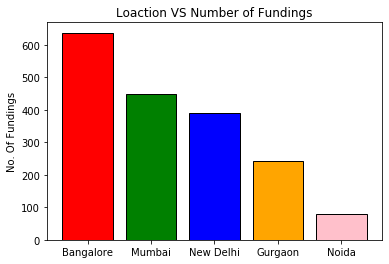

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df=pd.read_csv('startup_funding.csv')
df.CityLocation=df.CityLocation.str.title() #Capitalizing each word. eg-'new delhi'->'New Delhi','bangalore'->'Bangalore'.
df=df[df.CityLocation.notnull()] #Considering only those records which have not null location values. 
df['CityLocation'].replace('Delhi','New Delhi',inplace=True) #'Delhi'->'New Delhi'  
z=[]
d={} #dictionary: key=given 5 cities,values=number of startups which are funded in that city.
z=df.CityLocation.values  #'z' containing CityLocation column.
for i in range(len(z)): 
    temp=z[i].split('/') #splitting on '/' to get each location of a startup.  
    for j in temp:
        j=j.strip() 
        if j!='':   #j='' in cases like 'Bangalore/'
            if (j=='New Delhi')|(j=='Bangalore')|(j=='Gurgaon')|(j=='Noida')|(j=='Mumbai'): 
                if j not in d: #If any of the given cities are encountered then count them
                    d[j]=1
                else:
                    d[j]=d[j]+1
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #function to sort the dictionary acc. to the values.
j=0 # counter to print first value in the dictionary
for i in d:
    if j<5:
        print(i,d[i])
        j+=1
        
plt.bar(d.keys(),d.values(),edgecolor='black',color=['red','green','blue','orange','pink'])  #plotting a bar graph
plt.ylabel('No. Of Fundings')
plt.title('Loaction VS Number of Fundings')
plt.show()

2) Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also).
SOLUTION:   Sequoia Capital 64
            Accel Partners 53
            Kalaari Capital 44
            Saif Partners 43
            Indian Angel Network 41

JUSTIFICATION:
Similar approach as the previous question. After tackling all the conditions given in the question, i have used a dictionary that, for each INVESTOR NAME contains the corresponding NUMBER of startups it has funded.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
Saif Partners 43
Indian Angel Network 41


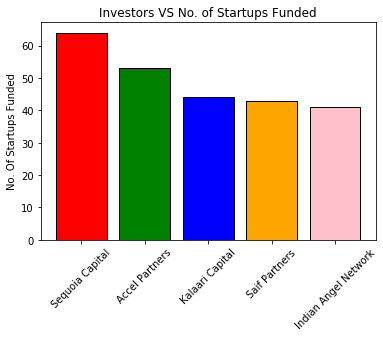

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df=pd.read_csv('startup_funding.csv')
df=df[df.InvestorsName.notnull()]       #Ignoring all the rows without any investor name.
df.InvestorsName=df.InvestorsName.str.title()       #Capitalising each word.
#Handling errors in typing Undisclosed
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investor','Undisclosed') 
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investors','Undisclosed')
df.InvestorsName=df.InvestorsName.str.replace('Undiscloseds','Undisclosed')
df=df[df.InvestorsName!='Undisclosed']       ##Ignoring all rows with Undisclosed investors.
a=df.StartupName          
a=np.array(a)     #Creating an array of StartUpName.
b=np.array(df.InvestorsName)    #Creating an array of InvestorName.
d={} #dictionary, key:InvestorName,values:List of startups funded by the respective investor.
temp=[]
for i in range(len(a)):             
    temp=b[i].split(',') #Splitting on ',' to get each name of the investor in each row.
    for j in temp:                  
        j=j.strip()                 
        x=[]  #x:holds list of startups. 
        if j!='':
            if j not in d: #creating the dictionary.
                x.append(a[i])
                d[j]=x
            else:
                x=d[j]
                x.append(a[i])
                d[j]=x
val=[]  #traversing each key again to modify values from list(statups funded)->number of startups funded.                    
for i in d:
    val=d[i] #VAL: temporary list hold the values of each key. 
    d[i]=len(val) #len(set)->number of startups.
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #to sort the array according to the values.
j=0
investor=[]
num=[]
for i in d: #printing top 5 investors.
    if j<5:
        print(i,d[i])
        investor.append(i)
        num.append(d[i])
        j+=1
        
plt.bar(investor,num,edgecolor='black',color=['red','green','blue','orange','pink'])
plt.xticks(rotation=45)
plt.ylabel('No. Of Startups Funded')
plt.title('Investors VS No. of Startups Funded')
plt.show()

3) Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. 

SOLUTION:    Sequoia Capital 48
             Accel Partners 47
             Kalaari Capital 41
             Indian Angel Network 41
             Blume Ventures 36

JUSTIFICATION: After working on all the conditions given in the questions, i used a Dictionary of InvestorNames to find the number of unique startups it funded. i used a set instead of a list to find unique values.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 41
Blume Ventures 36


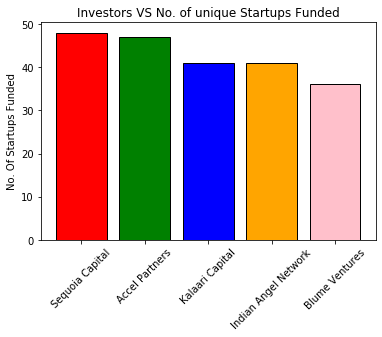

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re

df=pd.read_csv('startup_funding.csv')
df=df[df.InvestorsName.notnull()] # Considering only NOT NULL InvestorName.
df.InvestorsName=df.InvestorsName.str.title() #Capitalizing each word.
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investor','Undisclosed') #Correcting spellings of 'Undisclosed'.
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investors','Undisclosed')
df.InvestorsName=df.InvestorsName.str.replace('Undiscloseds','Undisclosed')
df.StartupName=df.StartupName.str.replace('Flipkart.com','Flipkart') #Correcting spellings of 'Flipkart'.
df.StartupName=df.StartupName.str.replace('OyoRooms','Oyo') #Correcting spellings of 'Oyo'.
df.StartupName=df.StartupName.str.replace('Oyo Rooms','Oyo')
df.StartupName=df.StartupName.str.replace('Oyorooms','Oyo')
df.StartupName=df.StartupName.str.replace('OYO Rooms','Oyo')
df.StartupName=df.StartupName.str.replace('Paytm Marketplace','Paytm') #Correcting spellings of 'Paytm'.
df.StartupName=df.StartupName.str.replace('Ola Cabs','Ola') #Correcting spellings of 'Ola'.
df.StartupName=df.StartupName.str.replace('Olacabs','Ola')
df=df[df.InvestorsName!='Undisclosed'] #Considering only those investors which are not undisclosed.
a=df.StartupName  
a=np.array(a) #Array of StartupName.
b=np.array(df.InvestorsName) #Array of InvestorName.
d={} #Dictionary: keys-InvestorName, Value- set(Startups funded)----to get the unique values of startups. 
temp=[]

for i in range(len(a)):
    temp=b[i].split(',') #Splitting to get each InvestorName.
    for j in temp:
        x=set() #x:set of Startups.
        if j.strip()!='':
            if j.strip() not in d: #Creating the Dictionary.
                x.add(a[i]) 
                d[j.strip()]=x
            else:
                x=d[j.strip()]
                x.add(a[i])
                d[j.strip()]=x
# modifying values of the dictionary from set(Startups)->number of unique Startups.
val=[] #VAL: temporary set to hold the value of each key.
for i in d:
    val=d[i]
    d[i]=len(val) #len(set) gives number of unique startups funded.
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #to sort the array according to the number of startups. 
j=0 #counter
investor=[]
num=[]
for i in d:
    if j<5:
        print(i,d[i]) #printing top 5 investors.
        investor.append(i)
        num.append(d[i])
        j+=1
        
plt.bar(investor,num,edgecolor='black',color=['red','green','blue','orange','pink'])#Bar graph to understand the trend in top 5.
plt.xticks(rotation=45)
plt.ylabel('No. Of Startups Funded')
plt.title('Investors VS No. of unique Startups Funded')
plt.show()

4) Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.
SOLUTION:   Indian Angel Network 34
            Rajan Anandan 23
            Group Of Angel Investors 19
            Letsventure 16
            Anupam Mittal 16

JUSTIFICATION: After working on all the conditions given in the questions, i used a Dictionary of InvestorNames to find the number of unique startups who have invested in CrowdFunding or SeedFunding. I used a set instead of a list to fund unique values.

Indian Angel Network 34
Rajan Anandan 23
Group Of Angel Investors 19
Letsventure 16
Anupam Mittal 16


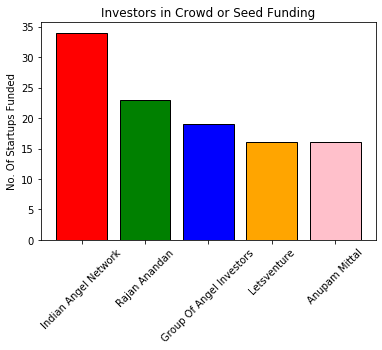

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re

df=pd.read_csv('startup_funding.csv')
df=df[(df.InvestorsName.notnull()) & (df.InvestmentType.notnull())] #taking all NOTNULL InvestorName and InvestorType.
df.InvestorsName=df.InvestorsName.str.title() #Capitalizing each word.
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investor','Undisclosed') #Correcting spellings of 'Undisclosed'.
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investors','Undisclosed')
df.InvestorsName=df.InvestorsName.str.replace('Undiscloseds','Undisclosed')
df.StartupName=df.StartupName.str.replace('Flipkart.com','Flipkart') #Correcting spellings of 'Flipkart'.
df.StartupName=df.StartupName.str.replace('OyoRooms','Oyo') #Correcting spellings of 'Oyo'.
df.StartupName=df.StartupName.str.replace('Oyo Rooms','Oyo')
df.StartupName=df.StartupName.str.replace('Oyorooms','Oyo')
df.StartupName=df.StartupName.str.replace('OYO Rooms','Oyo')
df.StartupName=df.StartupName.str.replace('Paytm Marketplace','Paytm')  #Correcting spellings of 'Paytm'.
df.StartupName=df.StartupName.str.replace('Ola Cabs','Ola')  #Correcting spellings of 'Ola'.
df.StartupName=df.StartupName.str.replace('Olacabs','Ola')
df.InvestmentType=df.InvestmentType.str.replace('CrowdFunding','Crowd Funding')  #Correcting spellings of 'Crowd Funding'.
df.InvestmentType=df.InvestmentType.str.replace('SeedFunding','Seed Funding')  #Correcting spellings of 'Seed Funding'.
df.InvestmentType=df.InvestmentType.str.replace('Seedfunding','Seed Funding')
df.InvestmentType=df.InvestmentType.str.replace('PrivateEquity','Private Equity')  #Correcting spellings of 'Private Equity'.
df.InvestmentType=df.InvestmentType.str.replace('Privateequity','Private Equity')
df=df[df.InvestorsName!='Undisclosed'] #Considering only those investors which are not undisclosed.
a=df.StartupName
a=np.array(a) #Array of StartupName.
b=np.array(df.InvestorsName) #Array of InvestorName.
d={} #Dictionary: Keys-InvestorName,Value-StartupName.
temp=[]
type=[]
type=np.array(df.InvestmentType) #Array of InvestmentType.
for i in range(len(a)):
    temp=b[i].split(',') #Splitting string on each "," to get each InvestorName.
    for j in temp:
        x=set() #x: set(StartupNames).
        j=j.strip()
        # For 'j' i.e. InvestorName if the InvestmentType is 'CrowdFunding' or 'SeedFunding' then add that 'Startup' to the set.
        if ((type[i]=='Crowd Funding') | (type[i]=='Seed Funding')&(j!='')): 
            if j not in d: #Hence creating the Dictionary
                x.add(a[i])
                d[j]=x
            else:
                x=d[j]
                x.add(a[i])
                d[j]=x
#Modifying values of the dictionary from set(Startups)->number of unique Startups.
val=[] #VAL: temporary set to hold the value of each key. 
for i in d:
    val=d[i]
    d[i]=len(val)
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #to sort the array according to no. of Startups. 
j=0 #counter
investor=[]
num=[]
for i in d:
    if j<5:
        print(i,d[i]) #printing top 5.
        investor.append(i)
        num.append(d[i])
        j+=1

       
plt.bar(investor,num,edgecolor='black',color=['red','green','blue','orange','pink'])#Bar graph to understand the trend in top 5.
plt.xticks(rotation=45)
plt.ylabel('No. Of Startups Funded')
plt.title('Investors in Crowd or Seed Funding')
plt.show()

5) Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity.

 SOLUTION:
            Sequoia Capital 45
            Accel Partners 43
            Kalaari Capital 35
            Blume Ventures 27
            Saif Partners 26

JUSTIFICATION: After working on all the conditions given in the questions, i used a Dictionary of InvestorNames to find the number of unique startups who have invested in PrivateEquity. I used a set instead of a list to fund unique values.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
Saif Partners 26


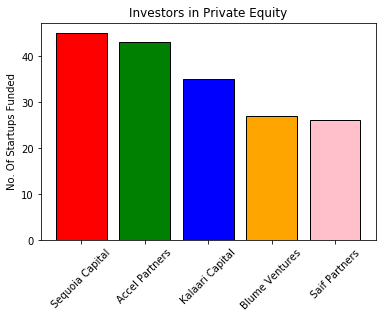

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re

df=pd.read_csv('startup_funding.csv')
df=df[(df.InvestorsName.notnull()) & (df.InvestmentType.notnull())] #taking all NOTNULL InvestorName and InvestorType.
df.InvestorsName=df.InvestorsName.str.title()
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investor','Undisclosed') #Correcting spellings of 'Undisclosed'.
df.InvestorsName=df.InvestorsName.str.replace('Undisclosed Investors','Undisclosed')
df.InvestorsName=df.InvestorsName.str.replace('Undiscloseds','Undisclosed')
df.StartupName=df.StartupName.str.replace('Flipkart.com','Flipkart') #Correcting spellings of 'Flipkart'.
df.StartupName=df.StartupName.str.replace('OyoRooms','Oyo') #Correcting spellings of 'Oyo'.
df.StartupName=df.StartupName.str.replace('Oyo Rooms','Oyo')
df.StartupName=df.StartupName.str.replace('Oyorooms','Oyo')
df.StartupName=df.StartupName.str.replace('OYO Rooms','Oyo')
df.StartupName=df.StartupName.str.replace('Paytm Marketplace','Paytm') #Correcting spellings of 'Paytm'.
df.StartupName=df.StartupName.str.replace('Ola Cabs','Ola') #Correcting spellings of 'Ola'.
df.StartupName=df.StartupName.str.replace('Olacabs','Ola')
df.InvestmentType=df.InvestmentType.str.replace('PrivateEquity','Private Equity') #Correcting spellings of 'Private Equity'.
df.InvestmentType=df.InvestmentType.str.replace('Privateequity','Private Equity')
df=df[df.InvestorsName!='Undisclosed']  #Considering only those investors which are not undisclosed.
a=df.StartupName
a=np.array(a) #Array of StartupName.
b=np.array(df.InvestorsName) #Array of InvestorName.
d={} #Dictionary: Keys-InvestorName,Value-StartupName.
temp=[]
type=[]
type=np.array(df.InvestmentType) #Array of InvestmentType.
for i in range(len(a)):
    temp=b[i].split(',') #Splitting string on each "," to get each InvestorName.
    for j in temp:
        x=set() #x: set(StartupNames).
        j=j.strip()
        #For 'j' i.e. InvestorName if the InvestmentType is 'PrivateEquity' then add that 'Startup' to the set.
        if ((type[i]=='Private Equity')&(j!='')):
            if j not in d: #Hence creating the Dictionary.
                x.add(a[i])
                d[j]=x
            else:
                x=d[j]
                x.add(a[i])
                d[j]=x
#Modifying values of the dictionary from set(Startups)->number of unique Startups.
val=[] #VAL: temporary set to hold the value of each key. 
for i in d:
    val=d[i]
    d[i]=len(val)
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #to sort the array according to no. of Startups.
j=0 #counter
investor=[]
num=[]
for i in d:
    if j<5:
        print(i,d[i]) #Printing top 5
        investor.append(i)
        num.append(d[i])
        j+=1

plt.bar(investor,num,edgecolor='black',color=['red','green','blue','orange','pink'])#Bar graph to understand the trend in top 5.
plt.xticks(rotation=45)
plt.ylabel('No. Of Startups Funded')
plt.title('Investors in Private Equity')
plt.show()       